In [1]:
# ----------------------------- Imports -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------- Load Dataset -----------------------------
df = pd.read_csv("Water_Quality_Dataset.csv")

# ----------------------------- Features & Target -----------------------------
X = df.drop(columns=['risk_percent'])
y = df['risk_percent']

# Identify categorical and numerical features
categorical_features = ['source_type', 'season', 'month']
numerical_features   = [col for col in X.columns if col not in categorical_features]

# ----------------------------- Preprocessing -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# ----------------------------- Train-Test Split -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Metrics:
MAE: 2.83
RMSE: 3.67
R2: 0.952


/tmp/ipython-input-4181297011.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_imp_df, palette='viridis')


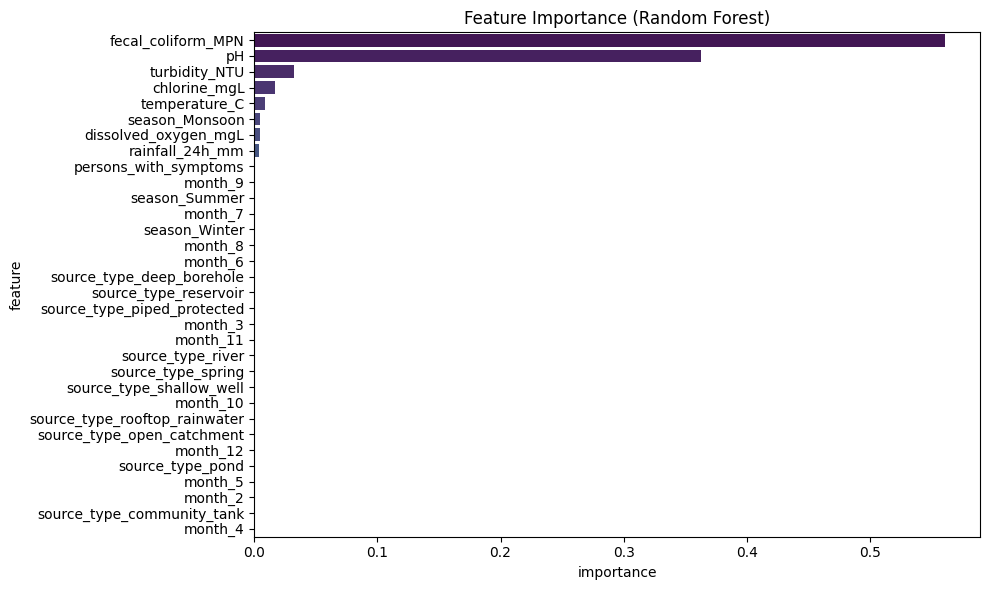

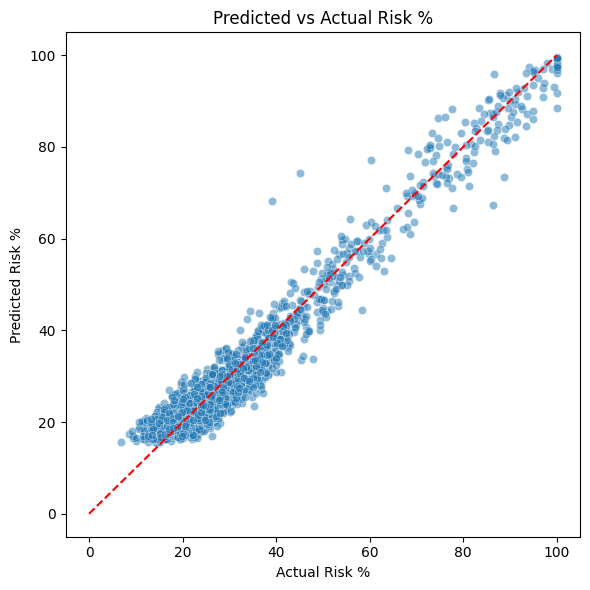

In [2]:
# ----------------------------- Pipeline: Preprocessing + Model -----------------------------
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=12,
        random_state=42,
        n_jobs=-1
    ))
])

#model training

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)),2))
print("R2:", round(r2_score(y_test, y_pred_rf),3))


# ----------------------------- Feature Importance -----------------------------
# Extract feature names after one-hot encoding
onehot_features = rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(onehot_features)

importances = rf_model.named_steps['regressor'].feature_importances_
feat_imp_df = pd.DataFrame({'feature': all_features, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# ----------------------------- Optional: Predicted vs Actual -----------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.xlabel("Actual Risk %")
plt.ylabel("Predicted Risk %")
plt.title("Predicted vs Actual Risk %")
plt.plot([0,100],[0,100], 'r--')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_lr),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)),2))
print("R2:", round(r2_score(y_test, y_pred_lr),3))


Linear Regression Metrics:
MAE: 5.66
RMSE: 11.27
R2: 0.549


In [4]:
import xgboost as xgb

xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_xgb),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)),2))
print("R2:", round(r2_score(y_test, y_pred_xgb),3))


XGBoost Metrics:
MAE: 2.68
RMSE: 3.64
R2: 0.953


In [5]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1))
])

et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

print("Extra Trees Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_et),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_et)),2))
print("R2:", round(r2_score(y_test, y_pred_et),3))


Extra Trees Metrics:
MAE: 3.38
RMSE: 4.7
R2: 0.922


In [9]:
import joblib

# Save Random Forest
joblib.dump(rf_model, "rf_water_model.pkl")

# Save XGBoost
joblib.dump(xgb_model, "xgb_water_model.pkl")

['xgb_water_model.pkl']